In [1]:
import pandas as pd
import numpy as np
import keras
from matplotlib import pyplot as plt

In [2]:
data = pd.read_csv('/content/Sniper_Data1.csv', error_bad_lines=False,sep=';')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
data

,Id,AlertId,TransactionTime,SenderSubId,Account,OrderStatus,Symbol,OrderQuantity,Price,SideId,LastShares,LastPrice,LastMarket,ClientOrderId,ExecId,Version,SelfTrade
0,13487764,{DF5722C4-4947-4CD0-8EDF-117600CB795C},2019-05-02 07:00:00.190000000,JTOWTDA,5J0802E1,0,PLI,200000.0,0.05,1.0,0.0,0.0,PTX,129756902,S0-253,0000000003DA7DBC,NaN
1,13487765,{0B029005-269B-4F4F-879D-4241AA15A412},2019-05-02 06:05:00.330000000,QJCLAA1,5J1003E1,0,CGGZ.UN,2100.0,3.23,1.0,0.0,0.0,AQN,ACL1-46996-1,S0-207,0000000003DA7DBE,NaN
2,13487766,{0B029005-269B-4F4F-879D-4241AA15A412},2019-05-02 06:05:00.330000000,QJCLAA1,5J1003E1,0,CCHW.WT,5000.0,1.90,2.0,0.0,0.0,AQN,ACL1-47561-1,S0-213,0000000003DA7DBF,NaN
3,13487767,{DFECD987-49E3-4F56-919E-D26CA43BE239},2019-05-02 07:02:55.200000000,JTSTMA2,5J0997E1,0,ADK,5000.0,0.33,1.0,0.0,0.0,CDX,892618E-2-5,S0-351,0000000003DA7DC1,NaN
4,13487768,{DFECD987-49E3-4F56-919E-D26CA43BE239},2019-05-02 07:02:55.200000000,JTSTMA2,5J0997E1,0,ADK,5000.0,0.33,1.0,0.0,0.0,CDX,892618E-2-5,S0-351,0000000003DA7DC2,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7186,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7187,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7188,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7189,{DF67809F-4446-49AA-9F25-059C6671CB19},17,32519307348,5J0734E1,2019-03-25 10:14:14.877000000,00000000037BFCE1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(7191, 17)

In [5]:
data.columns

Index(['Id', 'AlertId', 'TransactionTime', 'SenderSubId', 'Account',
       'OrderStatus', 'Symbol', 'OrderQuantity', 'Price', 'SideId',
       'LastShares', 'LastPrice', 'LastMarket', 'ClientOrderId', 'ExecId',
       'Version', 'SelfTrade'],
      dtype='object')

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7191 entries, 0 to 7190
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               4128 non-null   object 
 1   AlertId          4128 non-null   object 
 2   TransactionTime  4128 non-null   object 
 3   SenderSubId      4128 non-null   object 
 4   Account          4128 non-null   object 
 5   OrderStatus      4128 non-null   object 
 6   Symbol           3948 non-null   object 
 7   OrderQuantity    3948 non-null   float64
 8   Price            3948 non-null   float64
 9   SideId           3948 non-null   float64
 10  LastShares       3948 non-null   float64
 11  LastPrice        3948 non-null   float64
 12  LastMarket       3896 non-null   object 
 13  ClientOrderId    3948 non-null   object 
 14  ExecId           3948 non-null   object 
 15  Version          3948 non-null   object 
 16  SelfTrade        46 non-null     object 
dtypes: float64(5),

In [7]:
del data['SelfTrade']

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OrderQuantity,3948.0,14888.306231,73681.502488,0.0,500.0,2500.00,5000.0,1642000.0
Price,3948.0,9.751647,20.081780,0.0,0.3,5.01,10.4,645.9
SideId,3948.0,1.913121,1.397199,1.0,1.0,1.00,2.0,5.0
LastShares,3948.0,429.531408,4648.855465,0.0,0.0,0.00,0.0,150000.0
LastPrice,3948.0,1.423921,8.613470,0.0,0.0,0.00,0.0,115.0


In [9]:
#See if we have NAN values
#if it displays False means there is no NAN values
#If it displays True, means there is a NAN values
data. isna(). any()

Id                 True
AlertId            True
TransactionTime    True
SenderSubId        True
Account            True
OrderStatus        True
Symbol             True
OrderQuantity      True
Price              True
SideId             True
LastShares         True
LastPrice          True
LastMarket         True
ClientOrderId      True
ExecId             True
Version            True
dtype: bool

In [10]:
data.dropna(inplace=True)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3896 entries, 0 to 4179
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Id               3896 non-null   object 
 1   AlertId          3896 non-null   object 
 2   TransactionTime  3896 non-null   object 
 3   SenderSubId      3896 non-null   object 
 4   Account          3896 non-null   object 
 5   OrderStatus      3896 non-null   object 
 6   Symbol           3896 non-null   object 
 7   OrderQuantity    3896 non-null   float64
 8   Price            3896 non-null   float64
 9   SideId           3896 non-null   float64
 10  LastShares       3896 non-null   float64
 11  LastPrice        3896 non-null   float64
 12  LastMarket       3896 non-null   object 
 13  ClientOrderId    3896 non-null   object 
 14  ExecId           3896 non-null   object 
 15  Version          3896 non-null   object 
dtypes: float64(5), object(11)
memory usage: 517.4+ KB


In [13]:
data

,Id,AlertId,TransactionTime,SenderSubId,Account,OrderStatus,Symbol,OrderQuantity,Price,SideId,LastShares,LastPrice,LastMarket,ClientOrderId,ExecId,Version
0,13487764,{DF5722C4-4947-4CD0-8EDF-117600CB795C},2019-05-02 07:00:00.190000000,JTOWTDA,5J0802E1,0,PLI,200000.0,0.05,1.0,0.0,0.0,PTX,129756902,S0-253,0000000003DA7DBC
1,13487765,{0B029005-269B-4F4F-879D-4241AA15A412},2019-05-02 06:05:00.330000000,QJCLAA1,5J1003E1,0,CGGZ.UN,2100.0,3.23,1.0,0.0,0.0,AQN,ACL1-46996-1,S0-207,0000000003DA7DBE
2,13487766,{0B029005-269B-4F4F-879D-4241AA15A412},2019-05-02 06:05:00.330000000,QJCLAA1,5J1003E1,0,CCHW.WT,5000.0,1.90,2.0,0.0,0.0,AQN,ACL1-47561-1,S0-213,0000000003DA7DBF
3,13487767,{DFECD987-49E3-4F56-919E-D26CA43BE239},2019-05-02 07:02:55.200000000,JTSTMA2,5J0997E1,0,ADK,5000.0,0.33,1.0,0.0,0.0,CDX,892618E-2-5,S0-351,0000000003DA7DC1
4,13487768,{DFECD987-49E3-4F56-919E-D26CA43BE239},2019-05-02 07:02:55.200000000,JTSTMA2,5J0997E1,0,ADK,5000.0,0.33,1.0,0.0,0.0,CDX,892618E-2-5,S0-351,0000000003DA7DC2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,13491900,{0DB07B02-9FE5-4130-BEE0-4B8FAD6AD476},2019-05-02 09:36:14.340000000,QJREGDF,5J1633E1,4,HEXO.WT,3800.0,4.93,5.0,0.0,0.0,CX2,70837C376R0,S2-138150,0000000003DAAD13
4137,13491901,{0DB07B02-9FE5-4130-BEE0-4B8FAD6AD476},2019-05-02 09:36:14.340000000,QJREGDF,5J1633E1,4,HEXO.WT,4000.0,4.88,1.0,0.0,0.0,CHX,70844C365R2,S2-138153,0000000003DAAD14
4168,13491932,{0DB07B02-9FE5-4130-BEE0-4B8FAD6AD476},2019-05-02 09:36:14.570000000,QJREGDF,5J1633E1,4,HEXO.WT,4000.0,4.88,1.0,0.0,0.0,CX2,70844C373R0,S2-138289,0000000003DAAD33
4178,13491942,{0DB07B02-9FE5-4130-BEE0-4B8FAD6AD476},2019-05-02 09:36:17.720000000,QJREGDF,5J1633E1,0,HEXO.WT,4000.0,4.89,1.0,0.0,0.0,CHX,70844C378R0,S0-138901,0000000003DAAD3D


# **Remove the unusued columns**

In [14]:
del data['AlertId']
del data['Account']
del data['Symbol']
del data['LastShares']
del data['LastMarket']
del data['LastPrice']
del data['Version']
del data['ExecId']
del data['SenderSubId']

In [15]:
data

,Id,TransactionTime,OrderStatus,OrderQuantity,Price,SideId,ClientOrderId
0,13487764,2019-05-02 07:00:00.190000000,0,200000.0,0.05,1.0,129756902
1,13487765,2019-05-02 06:05:00.330000000,0,2100.0,3.23,1.0,ACL1-46996-1
2,13487766,2019-05-02 06:05:00.330000000,0,5000.0,1.90,2.0,ACL1-47561-1
3,13487767,2019-05-02 07:02:55.200000000,0,5000.0,0.33,1.0,892618E-2-5
4,13487768,2019-05-02 07:02:55.200000000,0,5000.0,0.33,1.0,892618E-2-5
...,...,...,...,...,...,...,...
4136,13491900,2019-05-02 09:36:14.340000000,4,3800.0,4.93,5.0,70837C376R0
4137,13491901,2019-05-02 09:36:14.340000000,4,4000.0,4.88,1.0,70844C365R2
4168,13491932,2019-05-02 09:36:14.570000000,4,4000.0,4.88,1.0,70844C373R0
4178,13491942,2019-05-02 09:36:17.720000000,0,4000.0,4.89,1.0,70844C378R0


In [ ]:
data.shape

(3896, 9)

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
OrderQuantity,3896.0,15065.331879,74155.654267,0.0,500.00,2600.00,5000.00,1642000.0
Price,3896.0,9.571479,20.152866,0.0,0.28,5.01,10.35,645.9
SideId,3896.0,1.902464,1.384949,1.0,1.00,1.00,2.00,5.0


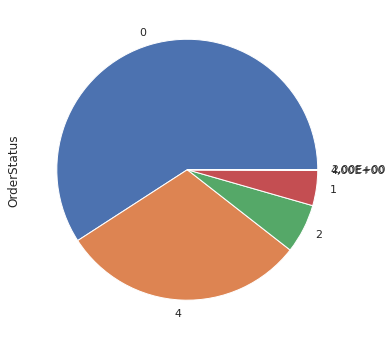

In [ ]:
#show the different senders
data['OrderStatus'].value_counts().plot(kind='pie', figsize=(10,6))

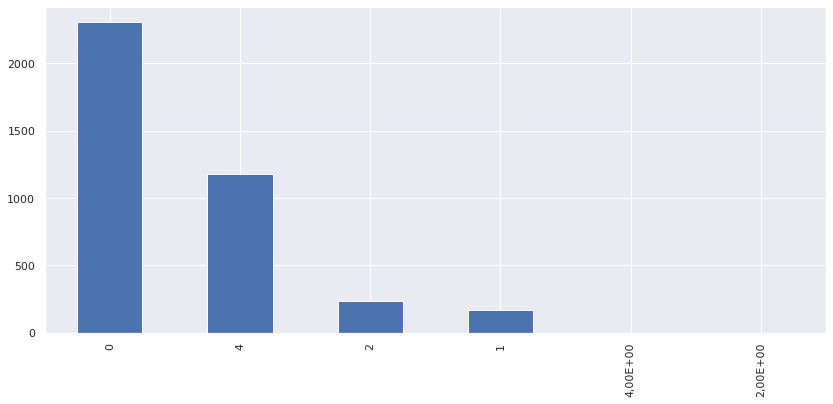

In [ ]:
#show the different OrderStatus
ax = data['OrderStatus'].value_counts().plot(kind='bar', figsize=(14,6))

# **Converting OrderStatus column into Character**

In [ ]:
def OrderStatus_char(x):
    if x=='0': return "NEW"
    if x=='4': return "CANCELLED"
    if x=='2': return "REPLACED"
    if x=="1": return "REPLACED"

In [ ]:
data['OrdStatusChar']=data['OrderStatus'].apply(OrderStatus_char)

In [ ]:
data

,Id,TransactionTime,SenderSubId,OrderStatus,OrderQuantity,Price,SideId,ClientOrderId,ExecId,OrdStatusChar
0,13487764,2019-05-02 07:00:00.190000000,JTOWTDA,0,200000.0,0.05,1.0,129756902,S0-253,NEW
1,13487765,2019-05-02 06:05:00.330000000,QJCLAA1,0,2100.0,3.23,1.0,ACL1-46996-1,S0-207,NEW
2,13487766,2019-05-02 06:05:00.330000000,QJCLAA1,0,5000.0,1.90,2.0,ACL1-47561-1,S0-213,NEW
3,13487767,2019-05-02 07:02:55.200000000,JTSTMA2,0,5000.0,0.33,1.0,892618E-2-5,S0-351,NEW
4,13487768,2019-05-02 07:02:55.200000000,JTSTMA2,0,5000.0,0.33,1.0,892618E-2-5,S0-351,NEW
...,...,...,...,...,...,...,...,...,...,...
4136,13491900,2019-05-02 09:36:14.340000000,QJREGDF,4,3800.0,4.93,5.0,70837C376R0,S2-138150,CANCELLED
4137,13491901,2019-05-02 09:36:14.340000000,QJREGDF,4,4000.0,4.88,1.0,70844C365R2,S2-138153,CANCELLED
4168,13491932,2019-05-02 09:36:14.570000000,QJREGDF,4,4000.0,4.88,1.0,70844C373R0,S2-138289,CANCELLED
4178,13491942,2019-05-02 09:36:17.720000000,QJREGDF,0,4000.0,4.89,1.0,70844C378R0,S0-138901,NEW


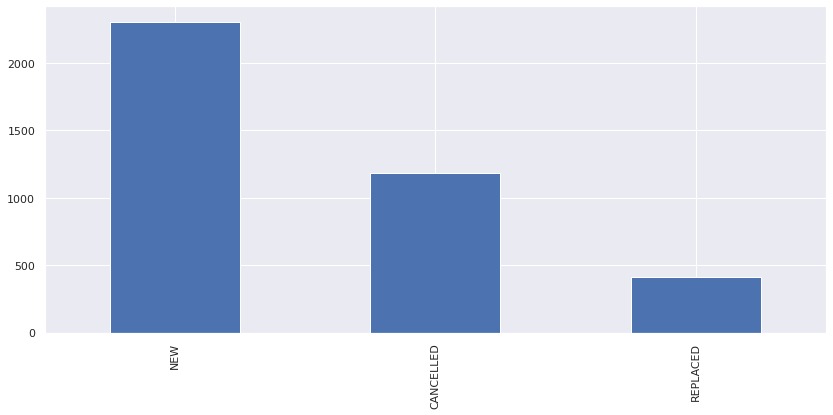

In [ ]:
#show the different OrderStatus
ax = data['OrdStatusChar'].value_counts().plot(kind='bar', figsize=(14,6))

In [ ]:
#groupby OrderStatus with 
first=data.groupby(['SenderSubId', 'OrdStatusChar'])
first.first(10)

OrderQuantity  Price  SideId
SenderSubId OrdStatusChar                              
5J0708E2    CANCELLED             3800.0   5.02     5.0
            NEW                    500.0  31.31     1.0
            REPLACED                 0.0   0.00     1.0
5J0734E1    CANCELLED              500.0  31.76     2.0
            NEW                  10000.0   0.04     1.0
...                                  ...    ...     ...
QJREGJP     REPLACED                 0.0   0.00     5.0
QJREGMS     CANCELLED             3200.0   5.01     1.0
            NEW                 200000.0   0.12     2.0
QJREGVV     NEW                   1000.0   7.73     2.0
            REPLACED                 0.0   0.00     2.0

[63 rows x 3 columns]

In [17]:
#show the different senders
data['SenderSubId'].value_counts().plot(kind='pie', figsize=(10,6))

KeyError: ignored

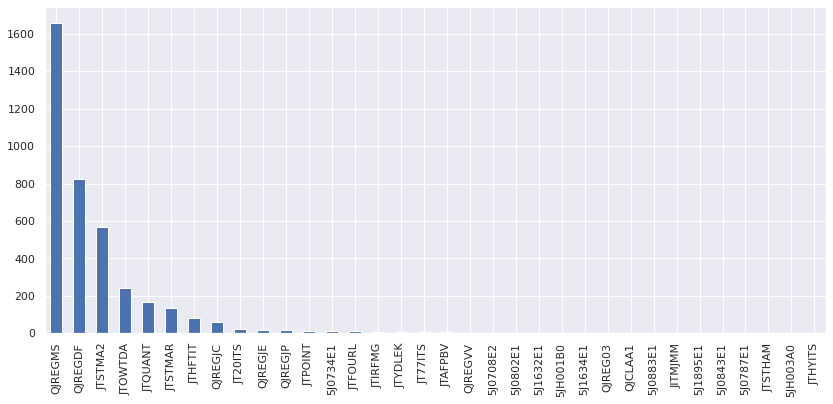

In [ ]:
#show the different SenderSubId
ax = data['SenderSubId'].value_counts().plot(kind='bar', figsize=(14,6))

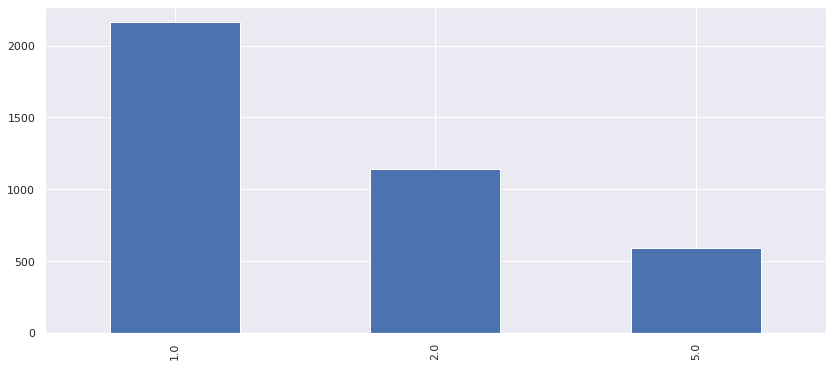

In [ ]:
#show the different side
ax = data['SideId'].value_counts().plot(kind='bar', figsize=(14,6))

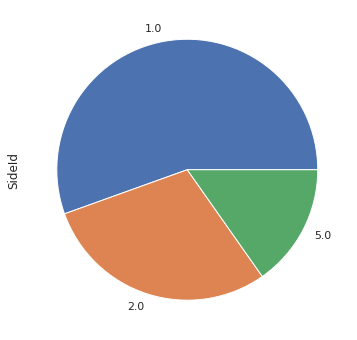

In [ ]:
#show the different side
data['SideId'].value_counts().plot(kind='pie', figsize=(10,6))

# **Converting Side column into character **

In [ ]:
def Side_char(x):
    if x=='1.0': return "BUY"
    if x=='2.0': return "SELL"
    if x=='5.0': return "CANCELLED"

In [ ]:
data['Side']=data['SideId'].apply(Side_char)

In [ ]:
data

,Id,TransactionTime,SenderSubId,OrderStatus,OrderQuantity,Price,SideId,ClientOrderId,ExecId,OrdStatusChar,Side
0,13487764,2019-05-02 07:00:00.190000000,JTOWTDA,0,200000.0,0.05,1.0,129756902,S0-253,NEW,None
1,13487765,2019-05-02 06:05:00.330000000,QJCLAA1,0,2100.0,3.23,1.0,ACL1-46996-1,S0-207,NEW,None
2,13487766,2019-05-02 06:05:00.330000000,QJCLAA1,0,5000.0,1.90,2.0,ACL1-47561-1,S0-213,NEW,None
3,13487767,2019-05-02 07:02:55.200000000,JTSTMA2,0,5000.0,0.33,1.0,892618E-2-5,S0-351,NEW,None
4,13487768,2019-05-02 07:02:55.200000000,JTSTMA2,0,5000.0,0.33,1.0,892618E-2-5,S0-351,NEW,None
...,...,...,...,...,...,...,...,...,...,...,...
4136,13491900,2019-05-02 09:36:14.340000000,QJREGDF,4,3800.0,4.93,5.0,70837C376R0,S2-138150,CANCELLED,None
4137,13491901,2019-05-02 09:36:14.340000000,QJREGDF,4,4000.0,4.88,1.0,70844C365R2,S2-138153,CANCELLED,None
4168,13491932,2019-05-02 09:36:14.570000000,QJREGDF,4,4000.0,4.88,1.0,70844C373R0,S2-138289,CANCELLED,None
4178,13491942,2019-05-02 09:36:17.720000000,QJREGDF,0,4000.0,4.89,1.0,70844C378R0,S0-138901,NEW,None


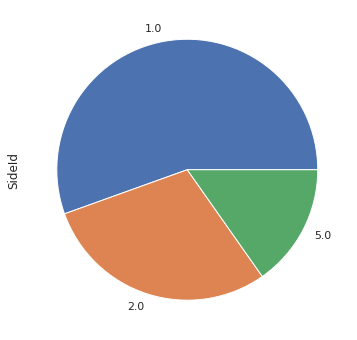

In [ ]:
#show the different side
data['SideId'].value_counts().plot(kind='pie', figsize=(10,6))

In [ ]:
#sorting the time
data1=data.sort_values(by='TransactionTime')
print(data1)

                                          Id TransactionTime SenderSubId  \
96                                  13487860   2/5/2019 8:10     JTSTMA2   
95                                  13487859   2/5/2019 8:10     JTSTMA2   
245                                 13488009   2/5/2019 8:32     JTSTMA2   
246                                 13488010   2/5/2019 8:32     JTSTMA2   
400                                 13488164   2/5/2019 8:53     JTSTMA2   
...                                      ...             ...         ...   
2474  {C1269712-171E-439C-97DC-1815768EFA98}      5061930147    5JH001B0   
2358  {F4858A9C-8DC6-4677-9F11-16E486E05982}     50619306376    5J1632E1   
2349  {8C3D1A11-456A-4B5B-920A-16CEF70A0F37}     50619306468    5J1632E1   
2166  {7F00E0E3-E270-4A24-94AB-1500EA7CD530}     50619307555    5J0883E1   
2448  {5CB6E356-244D-4C22-AD6D-17E0BD3162C7}      5061950198    5J0708E2   

     OrderStatus  OrderQuantity  Price  SideId     ClientOrderId    ExecId  \
96       

In [ ]:
data1

,Id,TransactionTime,SenderSubId,OrderStatus,OrderQuantity,Price,SideId,ClientOrderId,ExecId,OrdStatusChar,Side
96,13487860,2/5/2019 8:10,JTSTMA2,0,500.0,1.22,1.0,8927589-210-5,S0-5844,NEW,None
95,13487859,2/5/2019 8:10,JTSTMA2,0,500.0,1.22,1.0,8927589-210-5,S0-5844,NEW,None
245,13488009,2/5/2019 8:32,JTSTMA2,0,3000.0,0.61,1.0,8927989-2DF-5,S0-7084,NEW,None
246,13488010,2/5/2019 8:32,JTSTMA2,0,3000.0,0.61,1.0,8927989-2DF-5,S0-7084,NEW,None
400,13488164,2/5/2019 8:53,JTSTMA2,0,5000.0,0.31,1.0,8927D7A-38E-5,S0-9641,NEW,None
...,...,...,...,...,...,...,...,...,...,...,...
2474,{C1269712-171E-439C-97DC-1815768EFA98},5061930147,5JH001B0,"2,00E+00",3800.0,5.04,5.0,00000391327D0000,S2-86986,None,None
2358,{F4858A9C-8DC6-4677-9F11-16E486E05982},50619306376,5J1632E1,0,500.0,31.76,2.0,364153C42R0,S0-87575,NEW,None
2349,{8C3D1A11-456A-4B5B-920A-16CEF70A0F37},50619306468,5J1632E1,1,500.0,31.30,1.0,71775C252R0,S0-87535,REPLACED,None
2166,{7F00E0E3-E270-4A24-94AB-1500EA7CD530},50619307555,5J0883E1,2,1200.0,6.10,1.0,67984C386R0,S2-75720,REPLACED,None


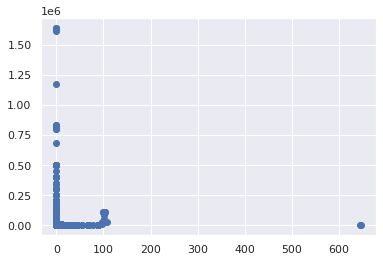

In [ ]:
plt.scatter(data['Price'], data['OrderQuantity'])

In [ ]:
data['Price'].value_counts().to_frame().head(10)

,Price
0.00,399
4.88,194
5.01,156
4.89,114
5.03,113
6.10,94
6.05,68
10.40,62
5.04,57
10.50,55


Text(0.5, 1.0, 'Price distributions per seconds')

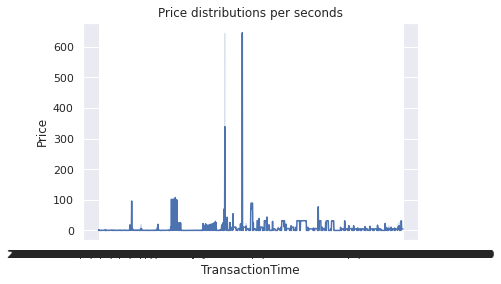

In [ ]:
sns.lineplot(x="TransactionTime",  y = 'Price',data=data ).set_title("Price distributions per seconds")

Text(0.5, 1.0, 'TransactTime & SideId')

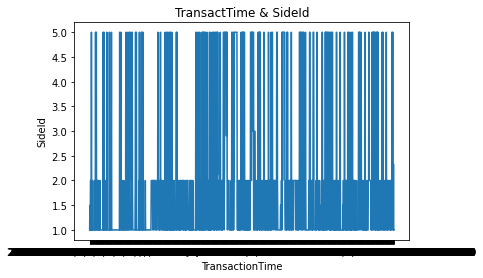

In [23]:
import seaborn as sns
sns.lineplot(x="TransactionTime",  y = 'SideId',data=data ).set_title("TransactTime & SideId")

Text(0.5, 1.0, 'Side & price')

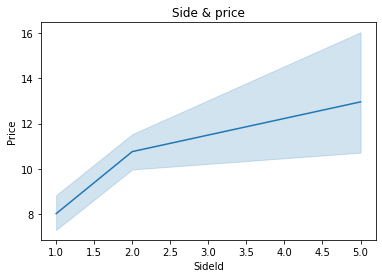

In [22]:
import seaborn as sns
sns.lineplot(x="SideId",  y = 'Price',data=data ).set_title("Side & price")

In [ ]:
data["ClientOrderId"] = data["ClientOrderId"].astype('category')
data["OrderStatus"] = data["OrderStatus"].astype('category')
data["SideId"] = data["SideId"].astype('category')


data["OrderQuantity"] = data["OrderQuantity"].astype('category')
data["Price"] = data["Price"].astype('category')

In [ ]:
data["ClientOrderId_num"] =data["ClientOrderId"].cat.codes
data["OrderStatus_num"] = data["OrderStatus"].cat.codes
data["SideId_num"] = data["SideId"].cat.codes

data["OrderQuantity_num"] =data["OrderQuantity"].cat.codes
data["Price_num"] =data["Price"].cat.codes


In [ ]:
data_frame=data[['ClientOrderId_num','OrderStatus_num','SideId_num','OrderQuantity_num','Price_num']].copy()

In [ ]:
cols_to_scale = ['ClientOrderId_num','OrderStatus_num','SideId_num','OrderQuantity_num','Price_num']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_frame[cols_to_scale] = scaler.fit_transform(data_frame[cols_to_scale])

In [ ]:
data_frame

,ClientOrderId_num,OrderStatus_num,SideId_num,OrderQuantity_num,Price_num
0,0.171059,0.0,0.0,0.880597,0.026954
1,0.947290,0.0,0.0,0.156716,0.396226
2,0.947787,0.0,0.5,0.358209,0.371968
3,0.809547,0.0,0.0,0.358209,0.180593
4,0.809547,0.0,0.0,0.358209,0.180593
...,...,...,...,...,...
4136,0.722029,0.8,1.0,0.283582,0.428571
4137,0.730482,0.8,0.0,0.298507,0.415094
4168,0.731477,0.8,0.0,0.298507,0.415094
4178,0.731974,0.0,0.0,0.298507,0.417790


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

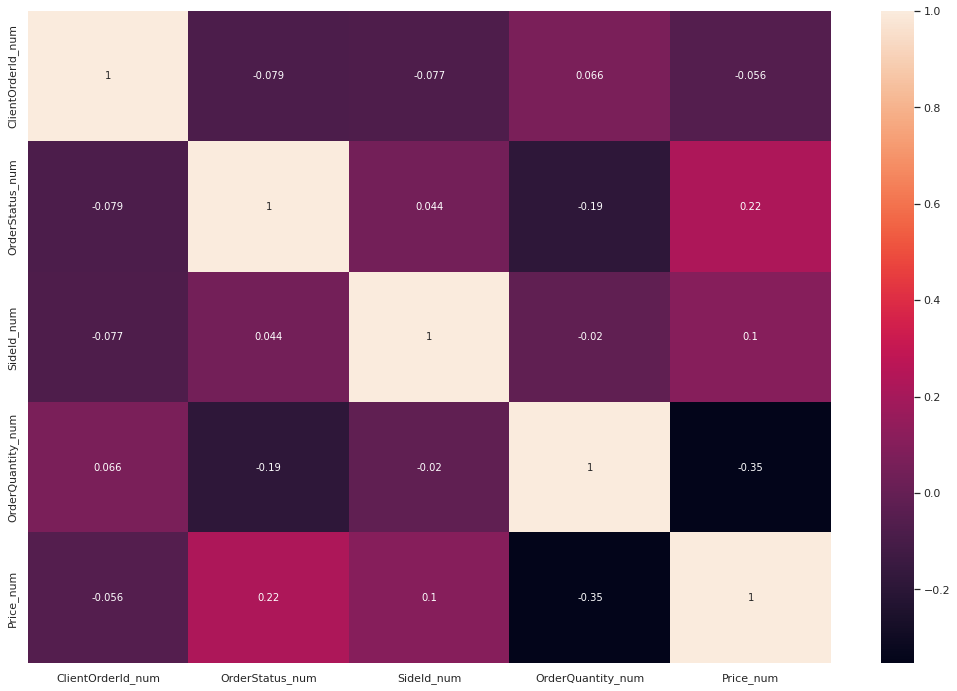

In [ ]:
plt.figure(figsize=(18,12))
sns.heatmap(data_frame.corr(), annot=True)
plt.show()


# **K-means**

In [ ]:
import numpy as nm    
import matplotlib.pyplot as mtp    
import pandas as pd    

In [ ]:
data_frame

,ClientOrderId_num,OrderStatus_num,SideId_num,OrderQuantity_num,Price_num
0,0.171059,0.0,0.0,0.880597,0.026954
1,0.947290,0.0,0.0,0.156716,0.396226
2,0.947787,0.0,0.5,0.358209,0.371968
3,0.809547,0.0,0.0,0.358209,0.180593
4,0.809547,0.0,0.0,0.358209,0.180593
...,...,...,...,...,...
4136,0.722029,0.8,1.0,0.283582,0.428571
4137,0.730482,0.8,0.0,0.298507,0.415094
4168,0.731477,0.8,0.0,0.298507,0.415094
4178,0.731974,0.0,0.0,0.298507,0.417790


**Extracting Independent Variables**

In [ ]:
x = data_frame.iloc[:, [0,2,4]].values  

In [ ]:
print(x)

[[0.17105917 0.         0.02695418]
 [0.94728991 0.         0.39622642]
 [0.94778717 0.5        0.37196765]
 ...
 [0.73147688 0.         0.41509434]
 [0.73197414 0.         0.41778976]
 [0.73197414 0.         0.41778976]]


**Step-2: Finding the optimal number of clusters using the elbow method**

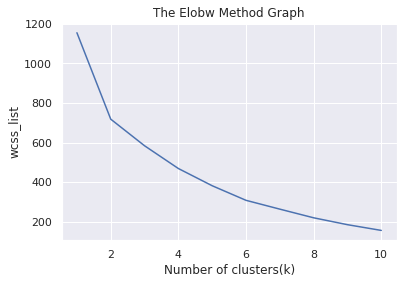

In [ ]:
#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1, 11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
mtp.plot(range(1, 11), wcss_list)  
mtp.title('The Elobw Method Graph')  
mtp.xlabel('Number of clusters(k)')  
mtp.ylabel('wcss_list')  
mtp.show()  


In [ ]:
from sklearn.datasets import make_blobs
X,y = make_blobs(centers=2, n_samples=20000, random_state=0, cluster_std=0.5)
print(X[:100],y[:100])

[[ 2.56680104e+00  9.71841385e-01]
 [ 1.50879331e+00  4.05801162e+00]
 [ 6.75791589e-01  4.65702313e+00]
 [ 2.70535338e+00  6.86343425e-01]
 [ 1.03995616e+00  4.02203991e+00]
 [ 7.73299215e-01  4.66597158e+00]
 [ 1.43555709e+00  3.43706972e-01]
 [ 1.99643923e+00  5.43045554e-01]
 [ 5.21888456e-01  4.09162852e+00]
 [ 6.16138733e-01  4.34022841e+00]
 [ 1.10394428e+00  4.58418446e+00]
 [ 2.16132665e+00  1.35702358e+00]
 [ 1.36726156e+00  3.54599475e+00]
 [ 1.22314097e+00  4.24573536e+00]
 [ 1.10382179e+00  3.43287282e+00]
 [ 2.00758509e+00  9.78431365e-01]
 [ 1.70033828e+00  2.32515804e-01]
 [ 8.64762984e-01  3.92554686e+00]
 [ 1.67114710e+00  5.68164314e-01]
 [ 1.91738925e+00  7.08839925e-01]
 [ 1.81039835e-01  3.91918146e+00]
 [ 9.66358211e-01  4.86401061e+00]
 [ 5.91691933e-01  4.01492074e+00]
 [ 2.51088962e+00  6.55914914e-01]
 [ 8.43001336e-01  4.01955691e+00]
 [ 1.83435467e+00  1.08374846e+00]
 [ 3.12559327e-01  4.35547055e+00]
 [ 4.82514401e-01  3.63675276e+00]
 [ 8.97791985e-01  3

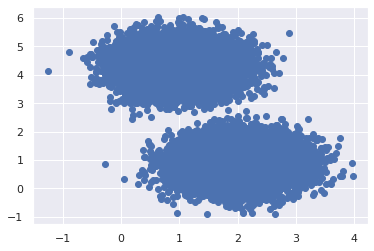

In [ ]:
plt.scatter(X[:,0],X[:,1]);

In [ ]:
#Here, we will take only two features and top 400 entries of each feature from the dataset just to make it easy to visualize the steps.
df = data_frame[["OrderStatus_num","SideId_num","Price_num"]]
df.head()

,OrderStatus_num,SideId_num,Price_num
0,0.0,0.0,0.026954
1,0.0,0.0,0.396226
2,0.0,0.5,0.371968
3,0.0,0.0,0.180593
4,0.0,0.0,0.180593


In [ ]:
#Here, we are assuming the value of k as 5
kmeans = KMeans(n_clusters=2)#Creating a K-Means Object
kmeans.fit(df)#Fitting the Model

KMeans(n_clusters=2)

In [ ]:
#Here, we are generating Labels of each point
labels = kmeans.predict(df)
labels

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [ ]:
#printing the centroids of each cluster
centroids = kmeans.cluster_centers_
centroids

array([[0.04743637, 0.2958318 , 0.35108736],
       [0.79932489, 0.30548523, 0.56671557]])

In [ ]:
#Sum of squared distances of data-points to their closest cluster center. It tells us how well the formed clusters are
kmeans.inertia_

846.6017775505741

**Let's visualize the Clustered Data**

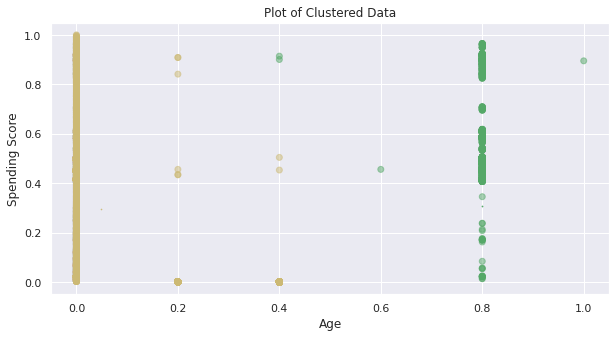

In [ ]:
plt.figure(figsize=(10, 5))
colmap = {1:'y',2:'g',3:'b',4:'r',5:'c'}
colors = map(lambda x: colmap[x+1], labels)
print(colors)
colors1=list(colors)

plt.scatter(df['OrderStatus_num'], df['Price_num'], color=colors1, alpha=0.5)
for idx, centroid in enumerate(centroids):
    plt.scatter(*centroid, color=colmap[idx+1])
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Plot of Clustered Data')
plt.show()

**K-means**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
from sklearn.cluster import KMeans

In [ ]:
from sklearn.datasets import make_blobs
X, y_pred = make_blobs(n_samples = 50000, centers = 2,
            cluster_std = 0.50, random_state = 0)

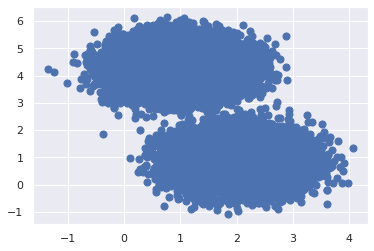

In [ ]:
plt.scatter(X[:, 0], X[:, 1], s = 50);
plt.show()

In [ ]:
kmeans = KMeans(n_clusters = 2)

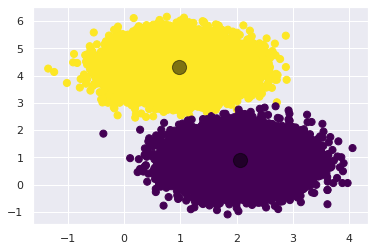

In [ ]:
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.scatter(X[:, 0], X[:, 1], c = y_kmeans, s = 50, cmap = 'viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c = 'black', s = 200, alpha = 0.5);
plt.show()

**K means**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

X = df


X_scaled = scale(X)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X_scaled)

In [ ]:
kmeans = KMeans(init='k-means++', n_clusters=2, n_init=1300)
kmeans.fit(X_reduced)

KMeans(n_clusters=2, n_init=1300)

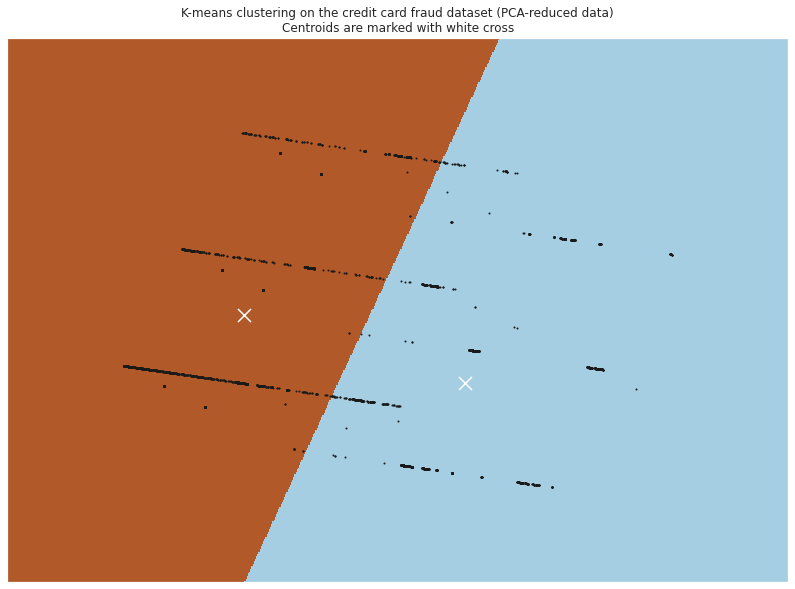

In [ ]:
h = .01
x_min, x_max = X_reduced[:, 0].min() - 1, X_reduced[:, 0].max() + 1
y_min, y_max = X_reduced[:, 1].min() - 1, X_reduced[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.figure(figsize=(14, 10))
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(X_reduced[:, 0], X_reduced[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the credit card fraud dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

**DBSCAN**

In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# Generate sample data
centers = [[1, 1], [-1, -1]]
num_clusters = 2
#DBSCAN_model = DBSCAN(n_clusters=num_clusters, init='k-means++', n_init=1, 
 #                        init_size=1000, batch_size=1000, verbose=False, max_iter=1000)

dbscan = DBSCAN(eps = 8, min_samples = 2).fit(x) # fitting the model
labels = dbscan.labels_ # getting the labels

In [ ]:
# Plot the clusters
#plt.scatter(x[:, 0], x[:,1], c = labels, cmap= "plasma") # plotting the clusters
#plt.xlabel("Income") # X-axis label
#plt.ylabel("Spending Score") # Y-axis label
#plt.show() # showing the plot

**K Means Youtube**

In [ ]:
data_frame

,ClientOrderId_num,OrderStatus_num,SideId_num,OrderQuantity_num,Price_num
0,0.171059,0.0,0.0,0.880597,0.026954
1,0.947290,0.0,0.0,0.156716,0.396226
2,0.947787,0.0,0.5,0.358209,0.371968
3,0.809547,0.0,0.0,0.358209,0.180593
4,0.809547,0.0,0.0,0.358209,0.180593
...,...,...,...,...,...
4136,0.722029,0.8,1.0,0.283582,0.428571
4137,0.730482,0.8,0.0,0.298507,0.415094
4168,0.731477,0.8,0.0,0.298507,0.415094
4178,0.731974,0.0,0.0,0.298507,0.417790


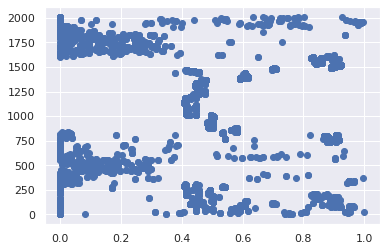

In [ ]:
plt.scatter(data_frame['Price_num'],data['ClientOrderId_num'])

In [ ]:
km=KMeans(n_clusters=2)
km

KMeans(n_clusters=2)

In [ ]:
y_predicted=km.fit_predict(data_frame[['Price_num','ClientOrderId_num','SideId_num','OrderStatus_num']])
y_predicted

array([0, 0, 0, ..., 1, 0, 1], dtype=int32)

In [ ]:
data_frame['Cluster']=y_predicted
data_frame

,ClientOrderId_num,OrderStatus_num,SideId_num,OrderQuantity_num,Price_num,Cluster
0,0.171059,0.0,0.0,0.880597,0.026954,0
1,0.947290,0.0,0.0,0.156716,0.396226,0
2,0.947787,0.0,0.5,0.358209,0.371968,0
3,0.809547,0.0,0.0,0.358209,0.180593,0
4,0.809547,0.0,0.0,0.358209,0.180593,0
...,...,...,...,...,...,...
4136,0.722029,0.8,1.0,0.283582,0.428571,1
4137,0.730482,0.8,0.0,0.298507,0.415094,1
4168,0.731477,0.8,0.0,0.298507,0.415094,1
4178,0.731974,0.0,0.0,0.298507,0.417790,0


No handles with labels found to put in legend.


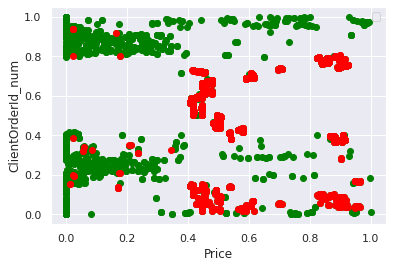

In [ ]:
data_frame1=data_frame[data_frame.Cluster==0]
data_frame2=data_frame[data_frame.Cluster==1]

plt.scatter(data_frame1.Price_num, data_frame1['ClientOrderId_num'], color='green')
plt.scatter(data_frame2.Price_num, data_frame2['ClientOrderId_num'], color='red')

#plt.scatter(km.cluster_centers_)


plt.xlabel('Price')
plt.ylabel('ClientOrderId_num')
plt.legend()

# **Hierarchical clutering**

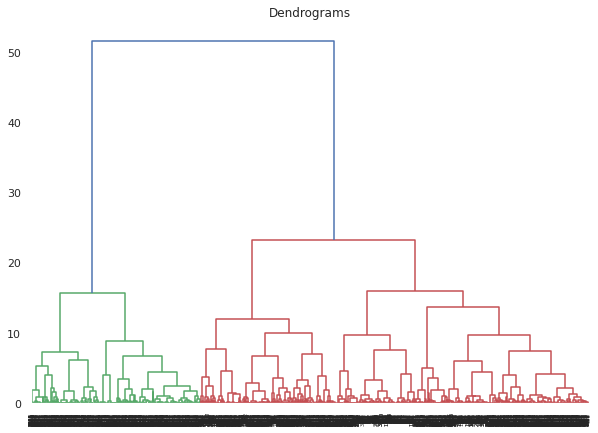

In [ ]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(data_frame, method='ward'))

In [ ]:
#As we can see, we have 2 clusters from the figure above, Let’s now apply hierarchical clustering for 2 clusters:

**Let's apply the hierarchical clustering for 2 clusters**

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(data_frame)

array([0, 0, 0, ..., 1, 0, 1])

In [ ]:
#We can see the values of 0s and 1s in the output since we defined 2 clusters. 
#0 represents the points that belong to the first cluster and 1 represents points in the second cluster.

**Let’s now visualize the two clusters:**

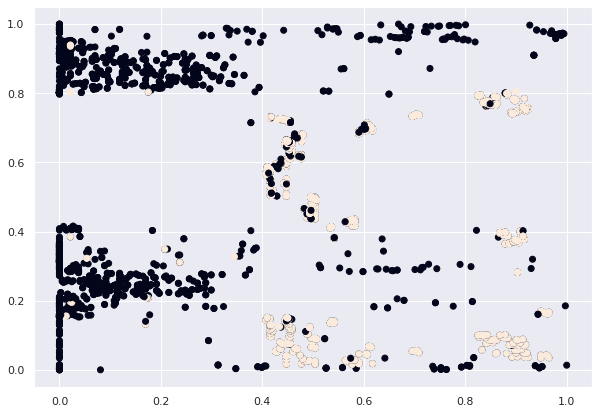

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(data_frame['Price_num'], data_frame['ClientOrderId_num'], c=cluster.labels_) 

# **PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(n_components=2)

In [ ]:
x=data_frame
x

,ClientOrderId_num,OrderStatus_num,SideId_num,OrderQuantity_num,Price_num,Cluster
0,0.171059,0.0,0.0,0.880597,0.026954,0
1,0.947290,0.0,0.0,0.156716,0.396226,0
2,0.947787,0.0,0.5,0.358209,0.371968,0
3,0.809547,0.0,0.0,0.358209,0.180593,0
4,0.809547,0.0,0.0,0.358209,0.180593,0
...,...,...,...,...,...,...
4136,0.722029,0.8,1.0,0.283582,0.428571,1
4137,0.730482,0.8,0.0,0.298507,0.415094,1
4168,0.731477,0.8,0.0,0.298507,0.415094,1
4178,0.731974,0.0,0.0,0.298507,0.417790,0


In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, data_frame[['Cluster']]], axis = 1)

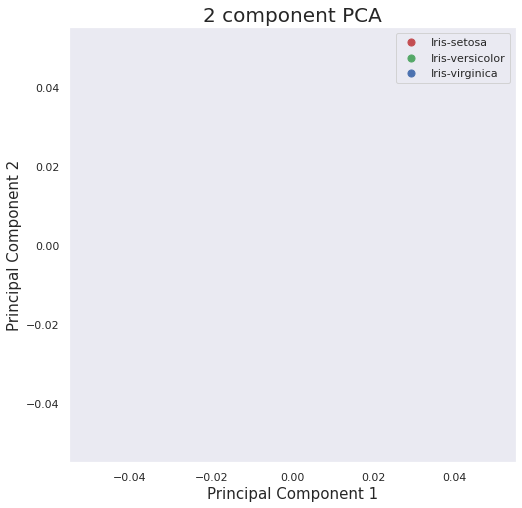

In [ ]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Cluster'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

# **Unsupervised Learning approach for detecting the threats**

In [ ]:
data

,Id,TransactionTime,SenderSubId,OrderStatus,OrderQuantity,Price,SideId,ClientOrderId,ExecId,OrdStatusChar,Side,ClientOrderId_num,OrderStatus_num,SideId_num,OrderQuantity_num,Price_num
0,13487764,2019-05-02 07:00:00.190000000,JTOWTDA,0,200000.0,0.05,1.0,129756902,S0-253,NEW,None,344,0,0,118,10
1,13487765,2019-05-02 06:05:00.330000000,QJCLAA1,0,2100.0,3.23,1.0,ACL1-46996-1,S0-207,NEW,None,1905,0,0,21,147
2,13487766,2019-05-02 06:05:00.330000000,QJCLAA1,0,5000.0,1.90,2.0,ACL1-47561-1,S0-213,NEW,None,1906,0,1,48,138
3,13487767,2019-05-02 07:02:55.200000000,JTSTMA2,0,5000.0,0.33,1.0,892618E-2-5,S0-351,NEW,None,1628,0,0,48,67
4,13487768,2019-05-02 07:02:55.200000000,JTSTMA2,0,5000.0,0.33,1.0,892618E-2-5,S0-351,NEW,None,1628,0,0,48,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4136,13491900,2019-05-02 09:36:14.340000000,QJREGDF,4,3800.0,4.93,5.0,70837C376R0,S2-138150,CANCELLED,None,1452,4,2,38,159
4137,13491901,2019-05-02 09:36:14.340000000,QJREGDF,4,4000.0,4.88,1.0,70844C365R2,S2-138153,CANCELLED,None,1469,4,0,40,154
4168,13491932,2019-05-02 09:36:14.570000000,QJREGDF,4,4000.0,4.88,1.0,70844C373R0,S2-138289,CANCELLED,None,1471,4,0,40,154
4178,13491942,2019-05-02 09:36:17.720000000,QJREGDF,0,4000.0,4.89,1.0,70844C378R0,S0-138901,NEW,None,1472,0,0,40,155


In [ ]:
df=data_frame
df.dtypes

ClientOrderId_num    float64
OrderStatus_num      float64
SideId_num           float64
OrderQuantity_num    float64
Price_num            float64
Cluster                int32
dtype: object

In [ ]:
from sklearn import preprocessing

In [ ]:
scale = preprocessing.StandardScaler()
X = scale.fit_transform(df)
X_norm = preprocessing.normalize(X)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


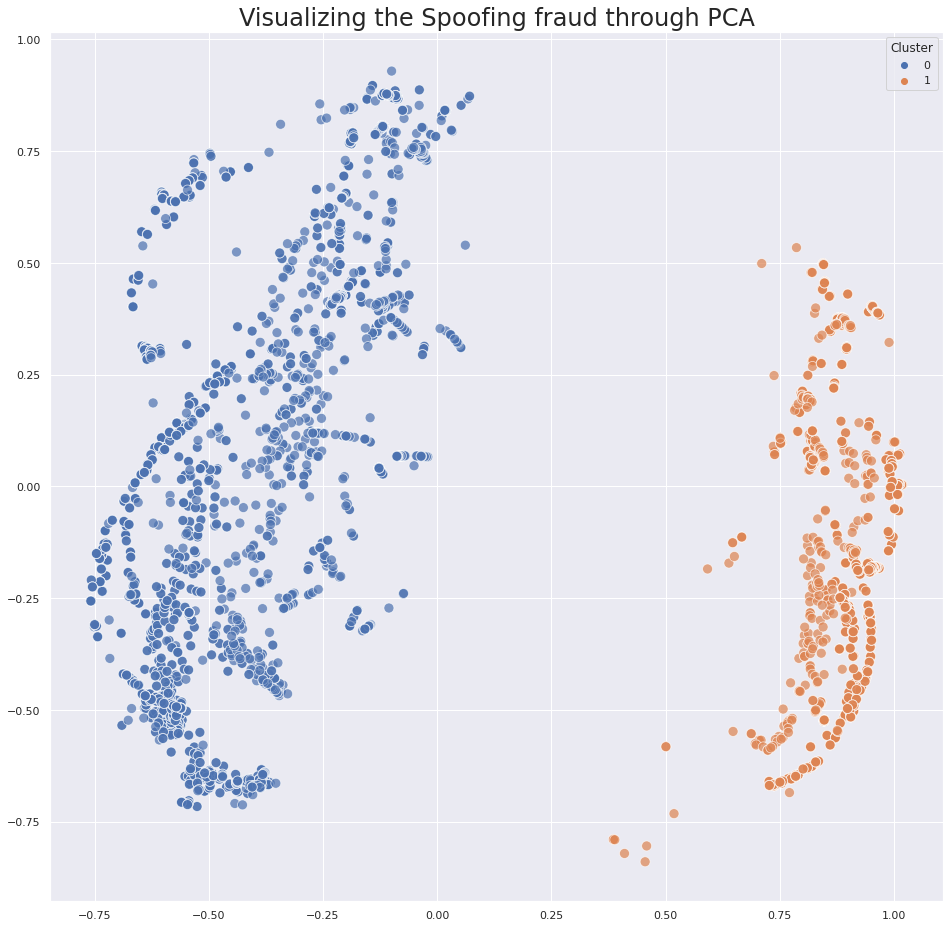

In [ ]:
pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(X_norm)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(principalComponents[:, 0], principalComponents[:, 1], s= 100, hue=data_frame['Cluster'], cmap='Spectral',alpha=0.7)
plt.title('Visualizing the Spoofing fraud through PCA', fontsize=24);

In [ ]:
from sklearn.manifold import TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


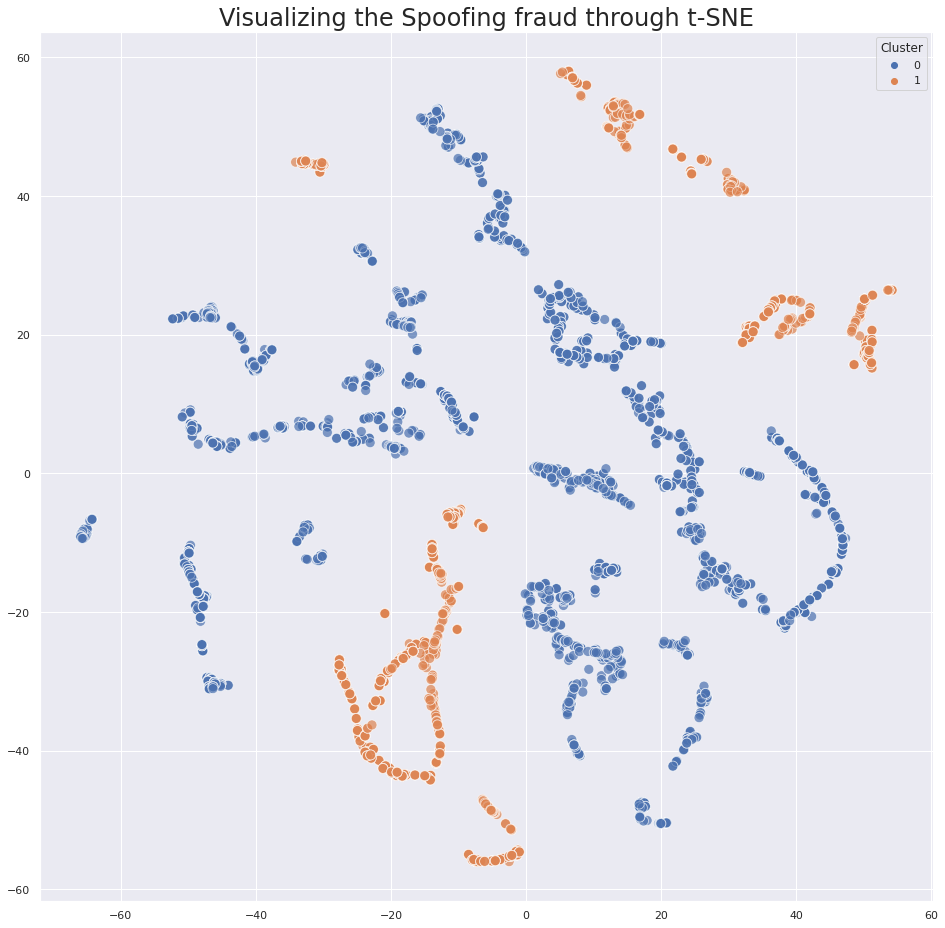

In [ ]:
pca_ = PCA(n_components=2) 
principalComponents = pca_.fit_transform(X_norm)
tsne_ = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=600).fit_transform(principalComponents)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(tsne_[:, 0], tsne_[:, 1], s= 100, hue=data_frame['Cluster'], cmap='Spectral',alpha=0.7)
plt.title('Visualizing the Spoofing fraud through t-SNE', fontsize=24);

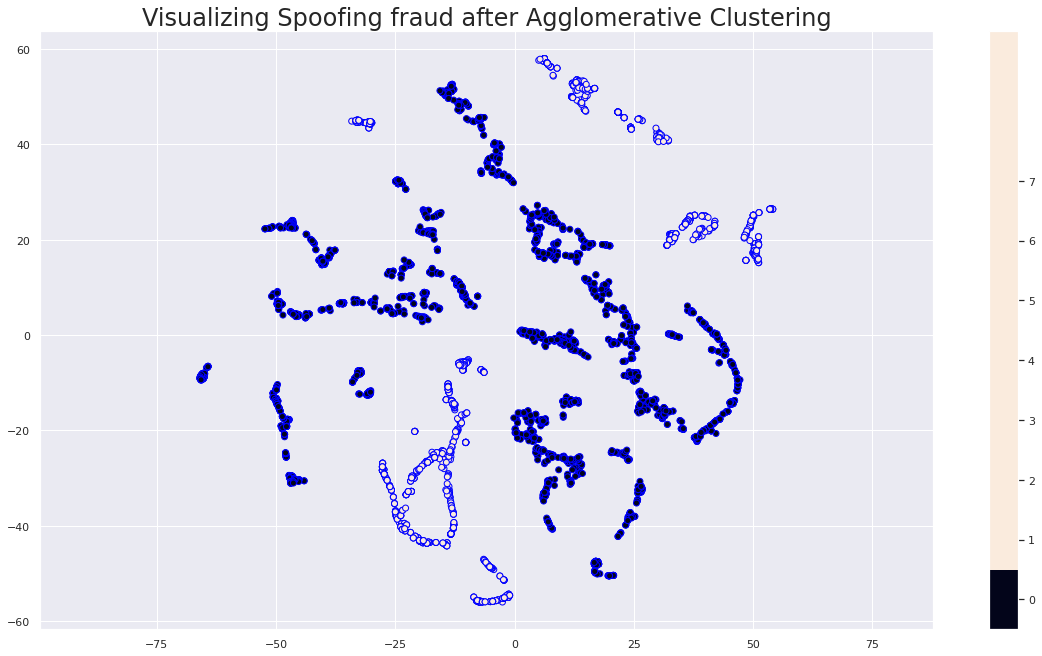

In [ ]:
Agglo = AgglomerativeClustering(n_clusters=2)
Agglo.fit(principalComponents)
plt.figure(figsize=(20,11))
plt.scatter(tsne_[:, 0],tsne_[:, 1], c=Agglo.labels_,edgecolors='blue')
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(8))
plt.title('Visualizing Spoofing fraud after Agglomerative Clustering', fontsize=24);
plt.show()

# **Supervised Learning**

In [ ]:
data_X = data_frame.drop(['Cluster'], axis = 1)

In [ ]:
data_X.shape

(3896, 5)

In [ ]:
data_y = data_frame['Cluster']

In [ ]:
data_y.shape

(3896,)

In [ ]:
#Encoding Label
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
data_y_trans = le.fit_transform(data_y)

In [ ]:
data_y_trans

array([0, 0, 0, ..., 1, 0, 1])

# **Feature selection**

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier(random_state=42)
model.fit(data_X, data_y_trans)

ExtraTreesClassifier(random_state=42)

In [ ]:
model.feature_importances_

array([0.01600515, 0.88204925, 0.00096836, 0.01289055, 0.08808668])

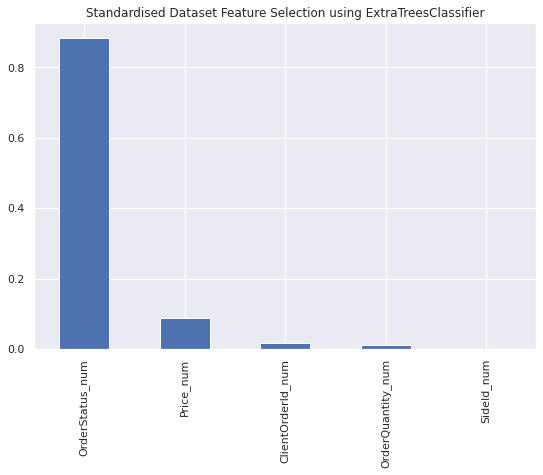

In [ ]:
plt.figure(figsize=(9,6))
feature_importance_std = pd.Series(model.feature_importances_, index=data_X.columns)
feature_importance_std.nlargest(20).plot(kind='bar', title='Standardised Dataset Feature Selection using ExtraTreesClassifier')

**Train Test Split Normal dataset ( All features)**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y_trans, test_size = 0.20, random_state = 10)

In [ ]:
X_train.shape

(3116, 5)

In [ ]:
X_test.shape

(780, 5)

In [ ]:
X_train.describe

<bound method NDFrame.describe of       ClientOrderId_num  OrderStatus_num  SideId_num  OrderQuantity_num  \
3667           0.413227              0.0         0.0           0.462687   
2254           0.707608              0.8         1.0           0.395522   
1167           0.463451              0.0         0.0           0.126866   
1900           0.593734              0.0         0.0           0.567164   
2822           0.099453              0.8         0.0           0.037313   
...                 ...              ...         ...                ...   
3498           0.643958              0.0         0.5           0.216418   
1365           0.912481              0.0         0.0           0.388060   
527            0.884137              0.0         0.5           0.671642   
3251           0.361014              0.4         0.0           0.000000   
1309           0.430632              0.0         1.0           0.253731   

      Price_num  
3667   0.536388  
2254   0.609164  
1167   0.48

In [ ]:
from sklearn.preprocessing import StandardScaler 
ss = StandardScaler()
X_train_std = ss.fit_transform(X_train)
X_test_std = ss.fit_transform(X_test)

# **Decision tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix

In [ ]:
data_X.head()

,ClientOrderId_num,OrderStatus_num,SideId_num,OrderQuantity_num,Price_num
0,0.171059,0.0,0.0,0.880597,0.026954
1,0.947290,0.0,0.0,0.156716,0.396226
2,0.947787,0.0,0.5,0.358209,0.371968
3,0.809547,0.0,0.0,0.358209,0.180593
4,0.809547,0.0,0.0,0.358209,0.180593


In [ ]:
X_train.shape

(3116, 5)

In [ ]:
#using decision tree
from sklearn.tree import DecisionTreeClassifier
DT_model = DecisionTreeClassifier() 

In [ ]:
DT_model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:
DT_pred = DT_model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,DT_pred)

0.9987179487179487

In [ ]:
# Confusion matrix on the test dataset
cnf_matrix = confusion_matrix(y_test,DT_pred)
cnf_matrix

array([[544,   0],
       [  1, 235]])

# **Random Forest Classifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score, precision_recall_curve, auc, f1_score
from sklearn.metrics import plot_confusion_matrix

In [ ]:
#Create a Gaussian Classifier
clf=RandomForestClassifier(n_estimators=100)

In [ ]:
#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred_random=clf.predict(X_test)

In [ ]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_random))

Accuracy: 0.9987179487179487


In [ ]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       236

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



# **Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier = LogisticRegression(random_state=42)

In [ ]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [ ]:
pred_logReg = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_test,pred_logReg)

1.0

# **KNN**

In [ ]:
#import important libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score as roc
from sklearn.model_selection import train_test_split as tts
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

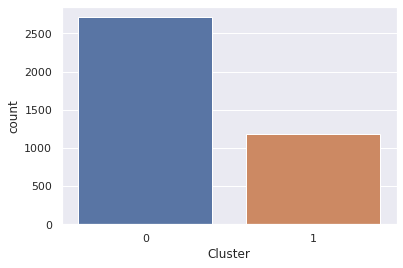

In [ ]:
#visualize the target class 'target_num'
sns.countplot(x='Cluster', data=data_frame)

In [ ]:
#our Label
data_frame.Cluster.value_counts(normalize=True)*100

0    69.584189
1    30.415811
Name: Cluster, dtype: float64

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model.fit(X_train,y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn=knn_model.predict(X_test)

In [ ]:
print(accuracy_score(y_test,y_pred_knn))

1.0


In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       544
           1       1.00      1.00      1.00       236

    accuracy                           1.00       780
   macro avg       1.00      1.00      1.00       780
weighted avg       1.00      1.00      1.00       780



# **SVM**

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, roc_curve, auc, average_precision_score

In [ ]:
classifier=svm.SVC(kernel='poly',degree=10)

In [ ]:
#Fit into Model
classifier.fit(X_train, y_train)

SVC(degree=10, kernel='poly')

In [ ]:
#Predict the class using X_test
predictions_SVM = classifier.predict(X_test)

In [ ]:
con_mat = confusion_matrix(y_test, predictions_SVM)
average_precision = average_precision_score(y_test, predictions_SVM)
cls_report = classification_report(y_test, predictions_SVM)

In [ ]:
from sklearn import metrics
#accuracy
print("acuracy:", metrics.accuracy_score(y_test,predictions_SVM))
#precision score
print("precision:", metrics.precision_score(y_test,predictions_SVM))
#recall score
print("recall" , metrics.recall_score(y_test,predictions_SVM))
print(metrics.classification_report(y_test, predictions_SVM))

acuracy: 0.9205128205128205
precision: 1.0
recall 0.7372881355932204
              precision    recall  f1-score   support

           0       0.90      1.00      0.95       544
           1       1.00      0.74      0.85       236

    accuracy                           0.92       780
   macro avg       0.95      0.87      0.90       780
weighted avg       0.93      0.92      0.92       780



# **ANN**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization

In [ ]:
callbacks= [
            
            EarlyStopping(monitor='accuracy', patience=10, verbose=1)
           ]

In [ ]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras import regularizers

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
keras.layers.BatchNormalization()
classifier.add(Dense(units =15 , kernel_initializer = 'uniform', activation = 'relu', input_dim = 5,kernel_regularizer=regularizers.l2(0.1)))

# Adding the second hidden layer
keras.layers.BatchNormalization()
classifier.add(Dense(units = 15, kernel_initializer = 'uniform', activation = 'relu',kernel_regularizer=regularizers.l2(0.1)))

# Adding the output layer
keras.layers.BatchNormalization()
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid',kernel_regularizer=regularizers.l2(0.1)))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])



# Fitting the ANN to the Training set
result= classifier.fit(X_train, y_train, batch_size = 100, callbacks=callbacks, epochs = 20, validation_data=(X_test, y_test))

Epoch 1/20
32/32 [==============================] - 1s 8ms/step - loss: 0.7013 - accuracy: 0.6804 - val_loss: 0.6890 - val_accuracy: 0.6974
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.6844 - accuracy: 0.6954 - val_loss: 0.6800 - val_accuracy: 0.6974
Epoch 3/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.6954 - val_loss: 0.6719 - val_accuracy: 0.6974
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6689 - accuracy: 0.6954 - val_loss: 0.6639 - val_accuracy: 0.6974
Epoch 5/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6606 - accuracy: 0.6954 - val_loss: 0.6559 - val_accuracy: 0.6974
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6529 - accuracy: 0.6954 - val_loss: 0.6482 - val_accuracy: 0.6974
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.6457 - accuracy: 0.6954 - val_loss: 0.6417 - val_accuracy: 0.6974
Epoch 8/20
32/32 [==

In [ ]:
# Predicting the Test set results
y_pred_ANN = classifier.predict(X_test)
y_pred = (y_pred_ANN > 0.5)

In [ ]:
score = classifier.evaluate(X_test, y_test)
score

25/25 [==============================] - 0s 1ms/step - loss: 0.6325 - accuracy: 0.6974


[0.6324718594551086, 0.6974359154701233]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


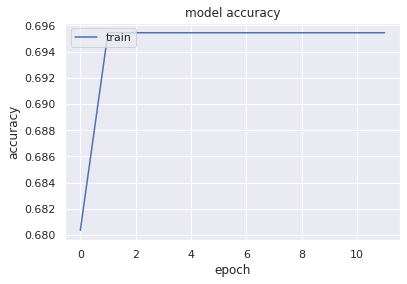

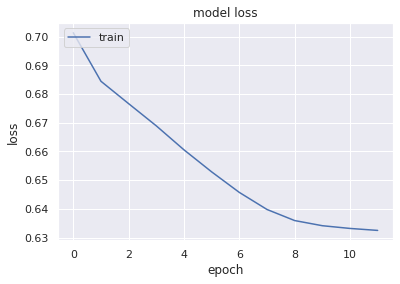

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline
# list all data in history
print(result.history.keys())
# summarize history for accuracy
plt.plot(result.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(result.history['loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()